In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import datetime
from matplotlib import rcParams
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import matplotlib.cbook as cbook
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec
import warnings
import itertools

In [3]:
# 一个cell里可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# 字体属性:
[x for x in dir(FontProperties) if not x.startswith("_")]

['copy',
 'get_family',
 'get_file',
 'get_fontconfig_pattern',
 'get_math_fontfamily',
 'get_name',
 'get_size',
 'get_size_in_points',
 'get_slant',
 'get_stretch',
 'get_style',
 'get_variant',
 'get_weight',
 'set_family',
 'set_file',
 'set_fontconfig_pattern',
 'set_math_fontfamily',
 'set_name',
 'set_size',
 'set_slant',
 'set_stretch',
 'set_style',
 'set_variant',
 'set_weight']

In [4]:
filep = r".\datasource\testdata.csv"
data = pd.read_csv(filep,index_col="trade_date",parse_dates=True)
data.sort_index(ascending=True,inplace=True)
data.head(1)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2021-03-19,000009.SZ,8.7,8.78,8.65,8.76,8.71,0.05,0.5741,321843.0,280668.282


# plt函数:

## quiver:Plot a 2D field of arrows.绘制二维箭头字段

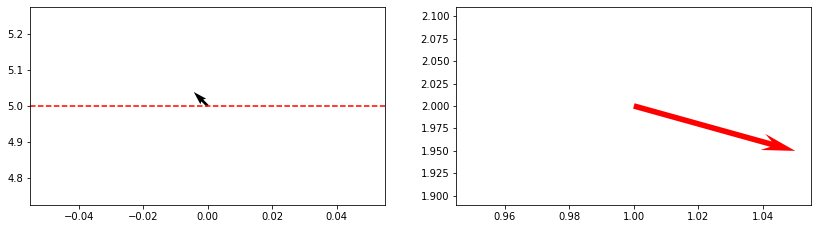

In [2]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)

ax1.quiver([0],[5],[-1],[1])  #箭头位置: x=0,y=5,方向:U:-1(x轴负方向),V:1(y轴正方向)
ax1.axhline(5,c='r',linestyle='--')

ax2 = fig.add_subplot(222)
ax2.quiver([1],
          [2],
          [1],
          [-1],
           units="width",
           angles='xy',
           scale=20,     #数值越小,箭头越长
           scale_units='xy',
           width=0.05,   #箭头的宽度
           headwidth=3,  #箭头头部宽度
           headlength=6, #箭头头部长度
           headaxislength=4.5,
           minshaft=5,
           minlength=1,
           pivot="tail",    #{'tail'，'mid'，'middle'，'tip'}，默认值：'tail'锚定到的箭头部分 X ， Y 网格。箭头围绕该点旋转。
           color='r',       #箭头的显式颜色。如果 C 已经被设定， 颜色 没有效果。
          )

## quiverkey(Q, X, Y, U, label, **kw) Add a key to a quiver plot.

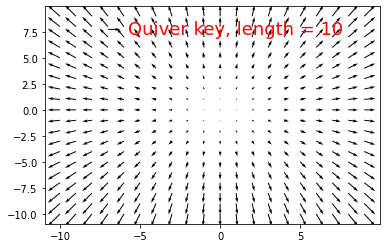

In [4]:
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots(figsize=(6,4))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=0.8, U=10,
             coordinates="figure",
             label='Quiver key, length = 10', labelpos='E',labelcolor='r',fontproperties={"size":18})

plt.rcParams["xtick.labelsize"]=18
plt.show()

## rc:设置当前的 rcParams.

### 获取用户配置路径:

In [4]:
# 获取用户配置路径:
mpl.get_configdir()

'C:\\Users\\osun\\.matplotlib'

### 获取当前使用的配置文件路径:

In [6]:
# 获取当前使用的配置文件路径:
mpl.matplotlib_fname()

'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

### 读取配置文件中所有参数及其参数值

In [7]:
# 在matplotlib模块载入时会调用rc_params()，并把得到的配置字典保存到rcParams变量中：
mpl.rc_params()

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [ ]:
# 2. 设置默认参数方法:
# 可以通过matplotlib.rcParams配置各matplotlib命令的默认参数，如下配置线条默认大小与颜色：?
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.color"] = 'r'

In [ ]:
# 3. 也可以通过matplot.rc一次设定多个参数:
mpl.rc("lines",linewidth=2,color='r')

In [ ]:
# 4. rcParams恢复缺省设置:
# 如果希望恢复到缺省的配置(matplotlib载入时从配置文件读入的配置)，可以调用rcdefaults():
mpl.rcdefaults()

In [ ]:
# 5. 如果手工修改了配置文件，希望重新从配置文件载入最新的配置，可以调用：
mpl.rcParams.update(mpl.rc_params())

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

plt.title("test")
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.titlecolor"] = 'red'

ax.text(s="rcParams Test",x=0.2,y=0.4)
plt.rcParams["text.color"] = 'blue'
plt.rcParams['font.size'] = 16

plt.rcParams['xtick.color'] = 'r'
plt.rcParams['xtick.labelsize'] = 10

## rc_context:返回用于临时更改rcParams的上下文管理器

In [ ]:
with mpl.rc_context({'interactive': False,'axes.facecolor':'red','axes.grid':True}):  #see rcParams.keys() for a list of valid parameters)'
    fig, ax = plt.subplots()
    ax.plot(range(3), range(3))
#     fig.savefig('example.png')
    plt.show()
    plt.close(fig)

### rcdefaults:恢复rcParams默认样式

In [ ]:
mpl.rcdefaults()

### rgrids:获取或设置当前极坐标图上的径向网格线

In [ ]:
lines, labels = rgrids()
lines, labels = rgrids(radii, labels=None, angle=22.5, fmt=None, **kwargs)

In [ ]:
# set the locations of the radial gridlines
lines, labels = rgrids( (0.25, 0.5, 1.0) )

# set the locations and labels of the radial gridlines
lines, labels = rgrids( (0.25, 0.5, 1.0), ('Tom', 'Dick', 'Harry' ))

## savefig:Save the current figure,保存当前图形

## sca(ax) Set the current Axes to ax and the current Figure to the parent of ax.

## scatter:散点图

## semilogx:在X轴上绘制对数比例图

[]

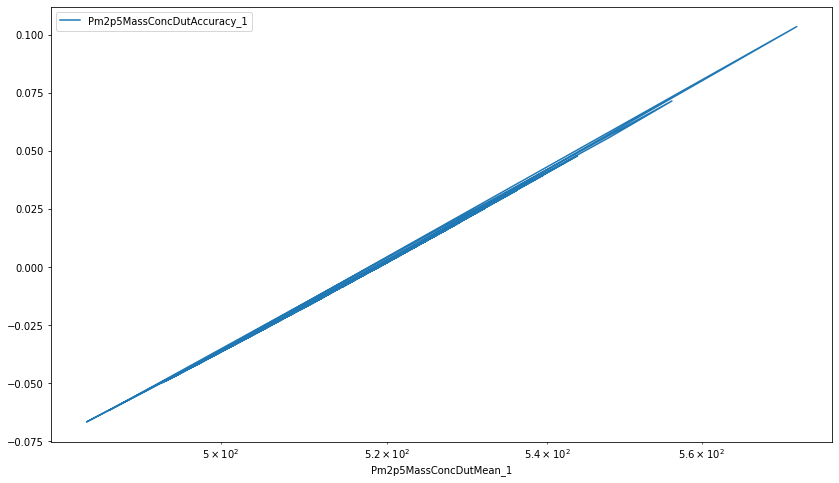

In [20]:
tt = dtc[["Pm2p5MassConcDutAccuracy_1","Pm2p5MassConcDutMean_1"]].head(30)
tt.set_index("Pm2p5MassConcDutMean_1",inplace=True)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
tt.plot(ax=ax,rot=45)
plt.rcParams['xtick.labelsize'] = 10
plt.semilogx()

## semilogy: Same as semilogx

## set_cmap
    设置默认颜色贴图，并将其应用于当前图像（如果有）

## setp:设置对象属性或属性的取值要求

[None]

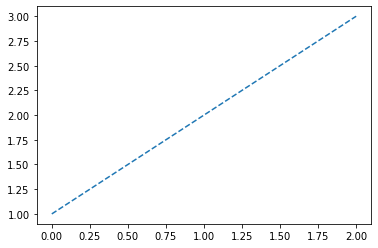

In [21]:
# 1. 设置一个对象属性:
line, = plt.plot([1, 2, 3])
plt.setp(line, linestyle='--')

[None, None]

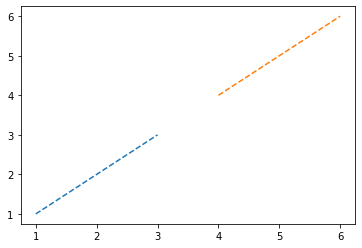

In [22]:
# 2. 设置多个对象属性:
lines = plt.plot([1, 2, 3],[1, 2, 3],[4, 5, 6],[4, 5, 6])
plt.setp(lines, linestyle='--')

## show:显示所有打开的的图形

[None, None]

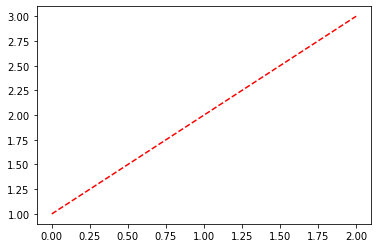

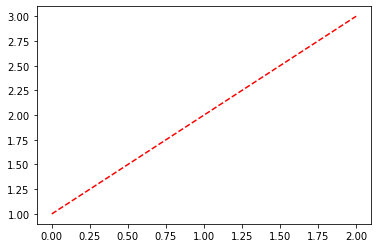

In [10]:
line, = plt.plot([1, 2, 3])
plt.setp(line,'linestyle','--','color','r')    
plt.show(False)

## specgram:Plot a spectrogram.

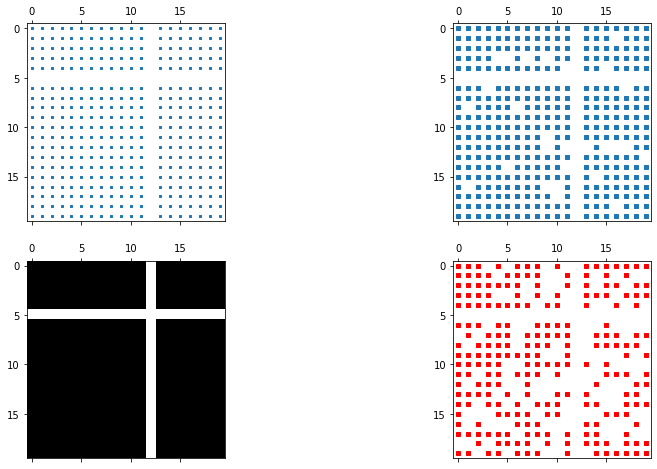

In [12]:
fig,ax=plt.subplots(2,2,figsize=(14,8))

x = np.random.randn(20,20)
x[5,:] = 0 
x[:, 12] = 0

ax[0,0].spy(x,markersize=2);
ax[0,1].spy(x,precision=0.1,markersize=4);

ax[1,0].spy(x);
ax[1,1].spy(x,precision=0.5,markersize=4,markerfacecolor='r',markeredgecolor='r');

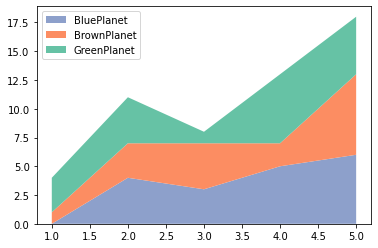

In [41]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,6,1)
y = [0,4,3,5,6]
y1 = [1,3,4,2,7]
y2 = [3,4,1,6,5]

labels = ["BluePlanet","BrownPlanet","GreenPlanet"]
colors = ["#8da0cb","#fc8d62","#66c2a5"]

plt.stackplot(x,y,y1,y2,labels=labels,colors=colors)

plt.legend(loc="upper left")

plt.show()

## stairs: 树干图

<StemContainer object of 3 artists>

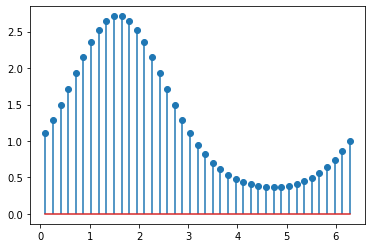

In [42]:
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)
plt.show()

## step:步进图

Text(0.5, 1.0, 'plt.step(where=...)')

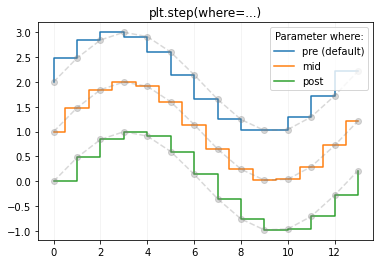

In [43]:
x = np.arange(14)
y = np.sin(x / 2)

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

## streamplot: 矢量流的流线

Text(0.5, 1.0, 'Varying Density')

Text(0.5, 1.0, 'Varying Color')

Text(0.5, 1.0, 'Varying Line Width')

Text(0.5, 1.0, 'Controlling Starting Points')

[(-3.0, 3.0), (-3.0, 3.0)]

Text(0.5, 1.0, 'Streamplot with Masking')

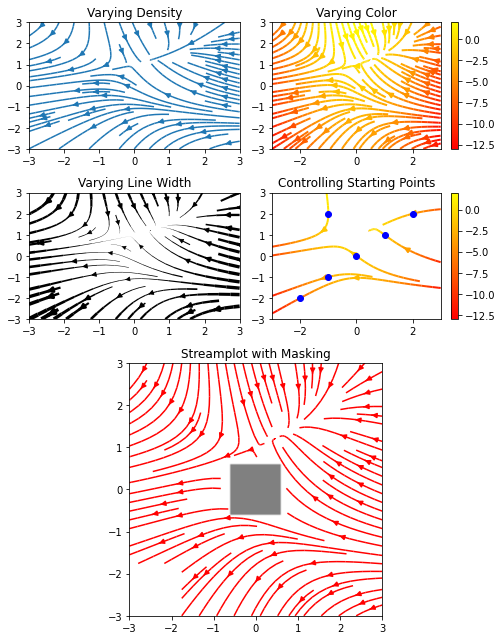

In [46]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

## subplot2grid:在常规网格中的特定位置创建子图

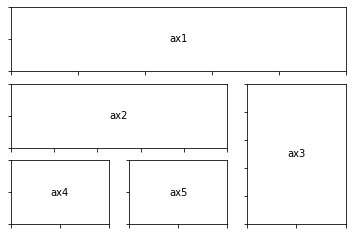

In [69]:
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

annotate_axes(fig)

plt.show()

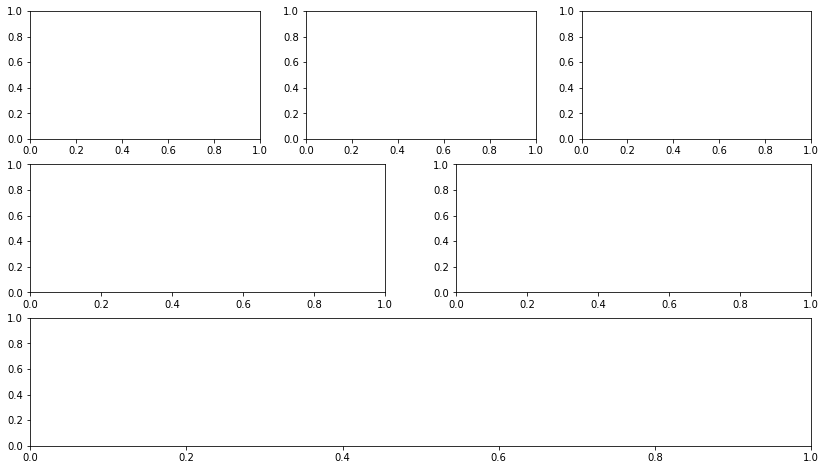

In [76]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(323)
ax5 = fig.add_subplot(324)
ax6 = fig.add_subplot(313)

## subplot_tool: 启动图的子批次工具窗口。

## subplots_adjust: adjust subplot layout调整布局

<AxesSubplot:>

<AxesSubplot:>

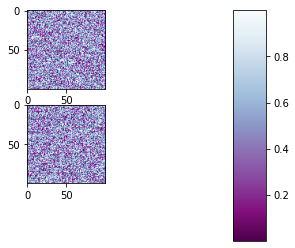

In [82]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.3, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## suptitle:在图形中添加居中的标题

Text(0.5, 0.98, '1th Title')

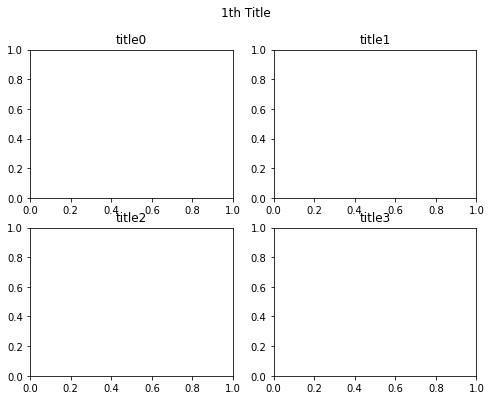

In [13]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

def tt(i,ax):
    ax.set_title(f"title{i}")

for i,ax in enumerate([ax1,ax2,ax3,ax4]):
    tt(i,ax)
    
plt.suptitle("1th Title")
# fig.suptitle('figtitle')


## table:

<BarContainer object of 5 artists>

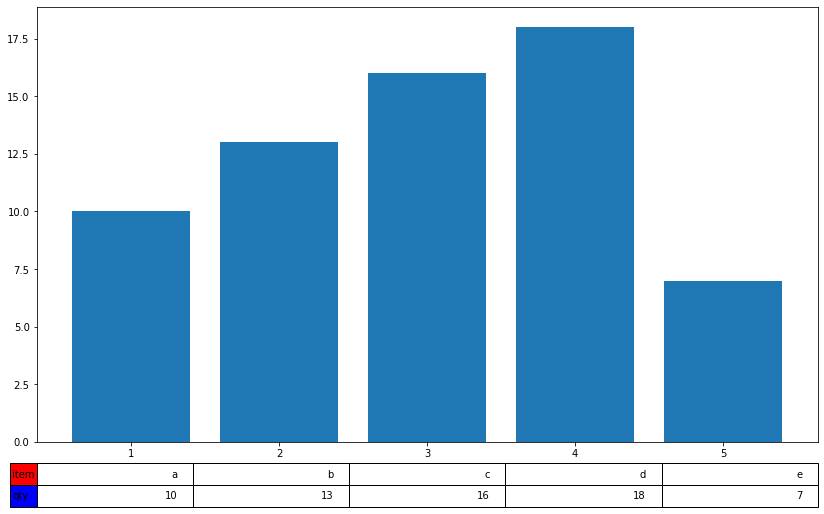

In [111]:
fig,ax = plt.subplots(figsize=(14,8))
ax.bar([1,2,3,4,5],[10,13,16,18,7])
plt.table(cellText=[['a','b','c','d','e'],[10,13,16,18,7]],
         rowLabels=["item","qty"],
         rowColours=["r","b"],
         loc="bottom",
         bbox=[0,-0.15,1,0.1],     #bbox:调节表格位置的
         )

## text:添加文本

<AxesSubplot:xlabel='trade_date'>

Text(2021-04-08 05:00, 10, 'Text')

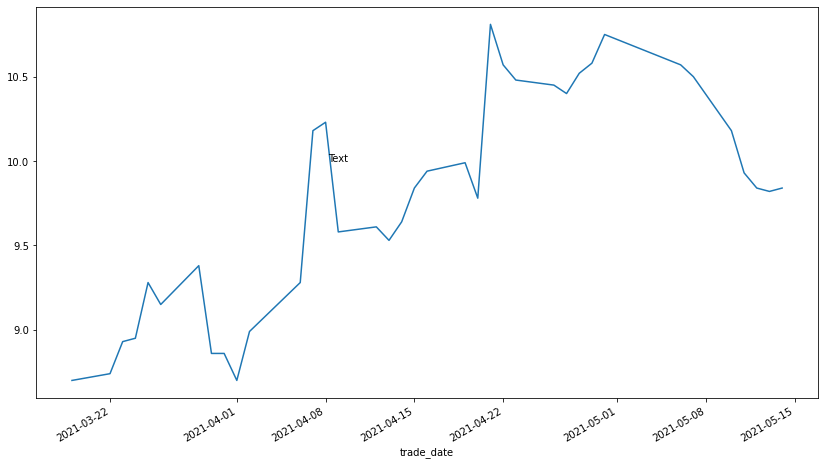

In [19]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

data["open"].plot(ax=ax)

plt.text(s="Text",x="2021-04-08 05:00",y=10)

## thetagrids:获取或设置当前极坐标图上的theta网格线

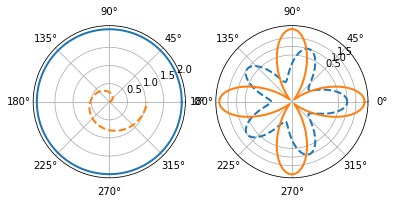

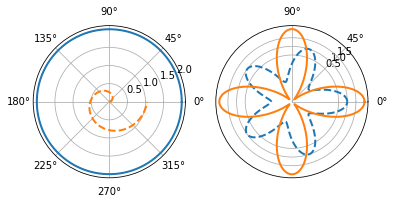

In [120]:

def polarp(the=True):
    theta=np.arange(0,2*np.pi,0.02)

    plt.subplot(121,polar=True)
    plt.plot(theta,2*np.ones_like(theta),lw=2)
    plt.plot(theta,theta/6,'--',lw=2)

    plt.subplot(122,polar=True)
    plt.plot(theta,np.cos(5*theta),'--',lw=2)
    plt.plot(theta,2*np.cos(4*theta),lw=2)
    plt.rgrids(np.arange(0.5,2,0.5),angle=45)
    
    if the:
        plt.thetagrids([0,45,90])
    plt.show()

polarp(False)
polarp()

## tick_params:更改刻度线、刻度标签和网格线的外观

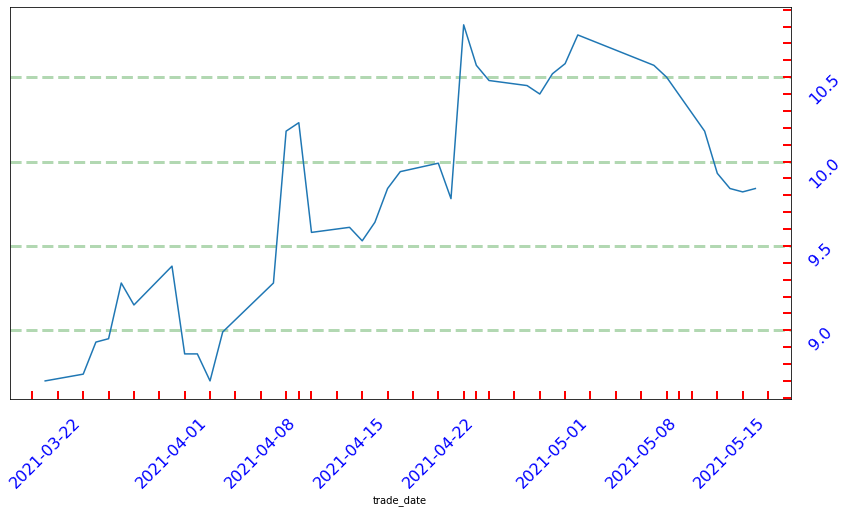

In [5]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
data["open"].plot()


plt.minorticks_on()
plt.grid(True,axis='y')
plt.tick_params(axis='both',    #'x', 'y', 'both'
                which="both",
#                 reset=True,   #如果设置成True,部分参数失效:labelrotation,
                direction='in',    #'in', 'out', 'inout'
                length=8,
                width=2,
                color='r',
                pad=16,     #Distance in points between tick and label
                labelsize=16,     # 功能同 plt.rcParams["xtick.labelsize"] = 16 
                labelcolor='blue',
#                 colors='red',        #Tick color and label color.
                zorder=1,
                top=False,      #top, left, right: bool; Whether to draw the respective ticks.
                right=True,
                left=False,
                labelbottom=True,     #labelbottom, labeltop, labelleft, labelright
                labelright=True,
                labelleft=False,
                labelrotation=45,
                grid_color='green',   #plt.grid() 也可以设置对应的属性
                grid_alpha=0.3,
                grid_linewidth=3,
                grid_linestyle="--"
                
               )


## ticklabel_format:

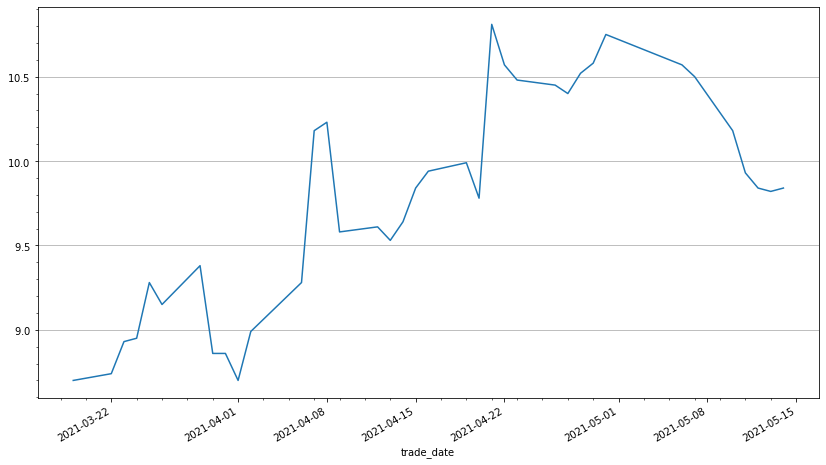

In [14]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
data["open"].plot()
plt.minorticks_on()
plt.grid(True,axis='y')
plt.ticklabel_format(axis='y',
                     style="sci",
                     useOffset=True,
                     useLocale=True,
                     useMathText=True,
                    )

## tight_layout: 调整子图之间的间隙及周围的填充

<ipython-input-35-626feb58d28c>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=1.08,


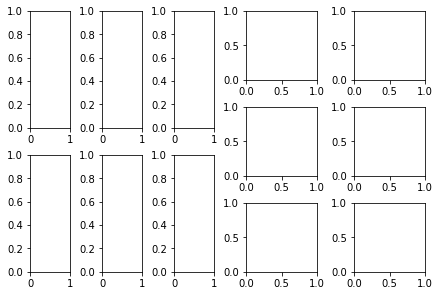

In [35]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])
        
plt.tight_layout(pad=1.08,
                 h_pad=5,    #相邻子块边缘之间的填充（高度/宽度），作为字体大小的一部分
                 w_pad=3,
                 rect=(1.8,1.8,1,1)     #(left, bottom, right, top)
                )

## title: 为轴设置标题

Text(0.5, 1.0, 'plt_title')

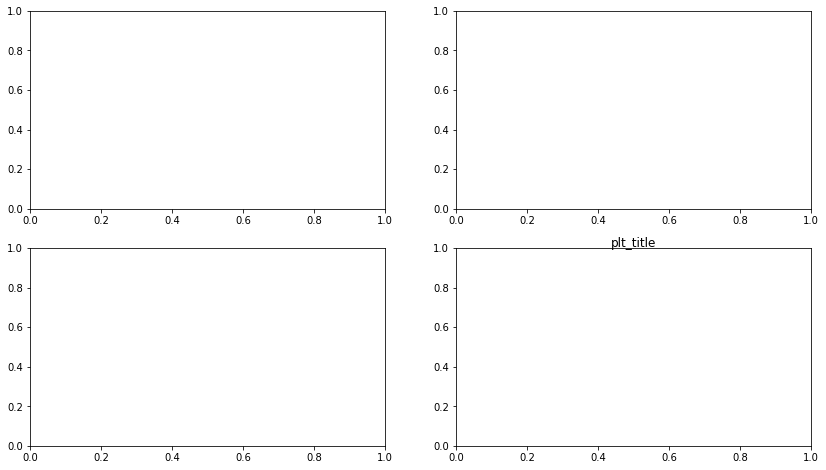

In [50]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.title("plt_title",     #默认只会在最近的一个subplot上面设置标题
          loc="center",
          y=1.0,         #text到subplot上边框的距离
          pad=1.0,       #text到subplot上边框的距离,微调
         )    

## tricontour:绘制等高线

## tricontourf:绘制等高线区域

## triplot:绘制一个非结构化的三角形网格作为线条和/或标记。

## twinx: 共享x轴

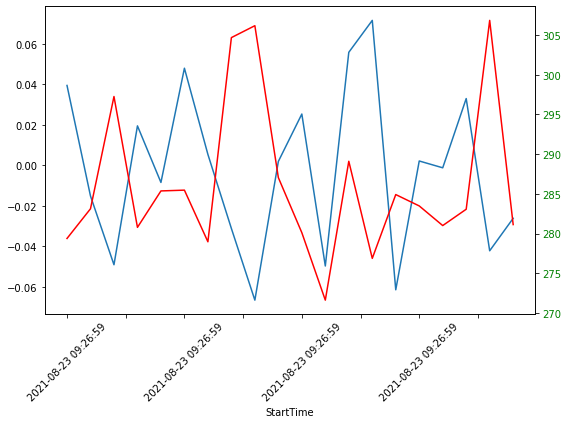

In [65]:
dt = dtc.head(20)
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

dt["Pm2p5MassConcDutAccuracy_1"].plot(ax=ax1,rot=45)
dt["Pm2p5MassConcDutMean_2"].plot(ax=ax2,color='r')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()

## twiny:共享y轴

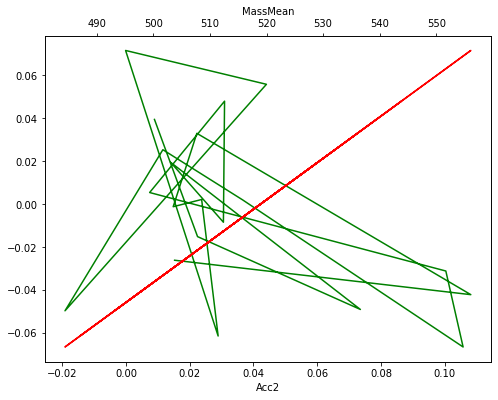

In [73]:
dt = dtc.head(20)
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot()
ax2 = ax1.twiny()

ax1.plot(dt["Pm2p5MassConcDutAccuracy_2"].tolist(),dt["Pm2p5MassConcDutAccuracy_1"].tolist(),color='green')
ax2.plot(dt["Pm2p5MassConcDutMean_1"].tolist(),dt["Pm2p5MassConcDutAccuracy_1"].tolist(),color='r')

ax1.set_xlabel("Acc2")
ax2.set_xlabel("MassMean")

plt.show()

## violinplot:小提琴图

{'bodies': [<matplotlib.collections.PolyCollection at 0x23d3b39ab20>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23d3b39aa00>,
 'cmins': <matplotlib.collections.LineCollection at 0x23d3b39b070>,
 'cbars': <matplotlib.collections.LineCollection at 0x23d3b39b3a0>}

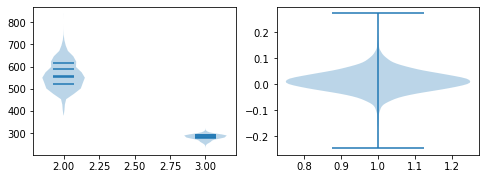

In [102]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.violinplot(dataset=[dtc["Pm2p5MassConcDutMean_1"],dtc["Pm2p5MassConcDutMean_2"]],
              positions=[2,3],
               widths=0.3,
               showmeans=True,     #是否显示均值
               showextrema=False,  #是否显示上下限 横线
               showmedians=True,    #是否显示中值
               quantiles=[[0.3,0.7,0.8],[0.3,0.7,0.8]],    #四分位,有两组,所以需要两个
               points=20,    #用于评估每个高斯核密度估计的点数
               
              )

ax2 = fig.add_subplot(222)
ax2.violinplot(dataset=dtc["Pm2p5MassConcDutAccuracy_1"])

## vline:绘制垂直线

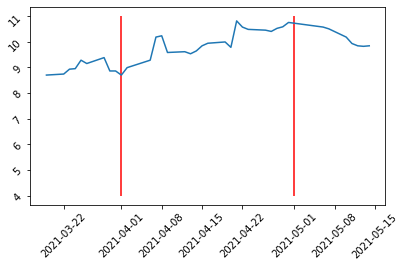

In [18]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot("open",data=data)
plt.tick_params(labelrotation=45)

t1 = pd.to_datetime('2021-04-01')
t2 = pd.to_datetime('2021-05-01')

plt.vlines(t1,ymin=4,ymax=11,colors='r')   #值是日期时,传入datetime时间格式的值;
plt.vlines(t2,ymin=4,ymax=11,colors='r')

## xcorr: 互相关

## xlabel/ylabel:x,y轴标签设置

Text(1, 0, 'Date')

Text(0, 0.5, 'value')

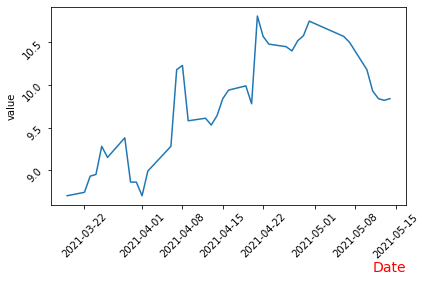

In [17]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot("open",data=data)
plt.tick_params(labelrotation=45)

plt.xlabel(xlabel="Date",
          labelpad=1,     #xlabel到axes显示区域的距离;
           loc="right",
           
           
           fontsize=14,
           color='r',           
          )
plt.ylabel(ylabel="value")

## xlim/ylim: 获取或设置当前轴的X,Y限制。

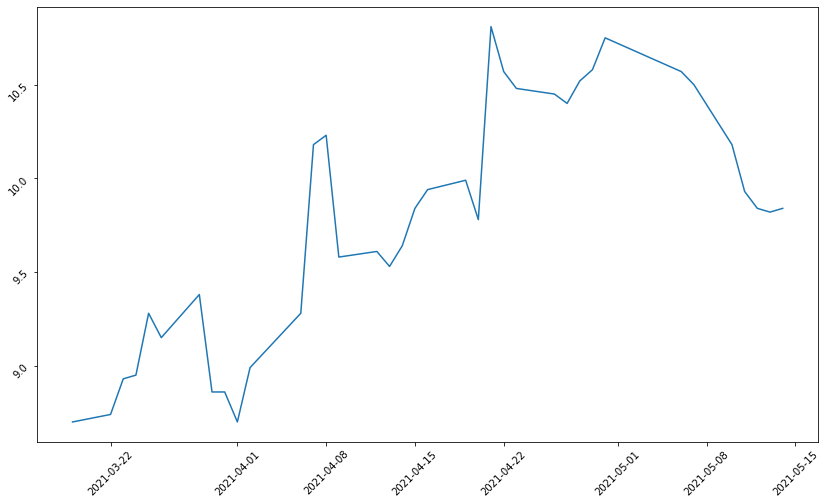

In [15]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()
ax1.plot("open",data=data)
plt.tick_params(labelrotation=45)

left,right = plt.xlim()
top,bottom = plt.ylim()

## xscale/yscale: 设置x,y轴数据形式,指数...

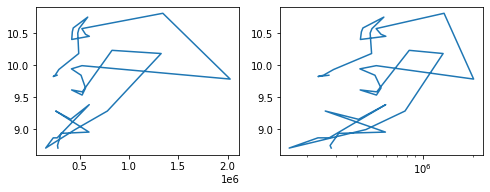

In [10]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot(data["amount"],data['open'])
plt.xscale("linear")

ax2 = fig.add_subplot(222)
ax2.plot(data["amount"],data['open'])
plt.xscale("log")

## xticks/yticks:获取或设置X,y轴的当前刻度位置和标签。

array([18708., 18718., 18725., 18732., 18739., 18748., 18755., 18762.])

array([ 8.5,  9. ,  9.5, 10. , 10.5, 11. ])

[]

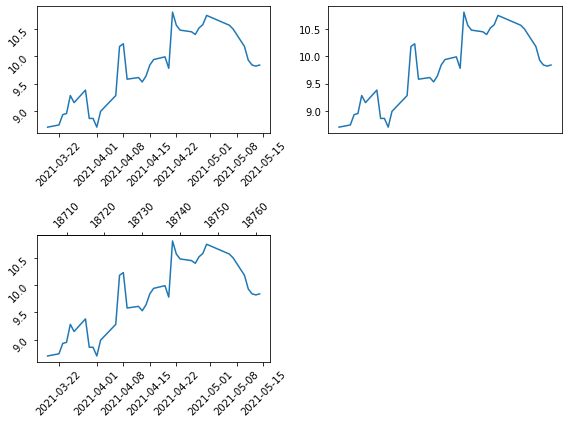

In [36]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax1.plot("open",data=data)
plt.tick_params(labelrotation=45)

ax1.get_xticks()
ax1.get_yticks()

ax2 = fig.add_subplot(222)
ax2.plot("open",data=data)
ax2.set_xticks([])          #不显示x轴刻度

ax3 = fig.add_subplot(223)
ax3.plot("open",data=data)
ax3.tick_params(labelrotation=45)

secax = ax3.secondary_xaxis("top",)   #添加次坐标
secax.tick_params(labelrotation=45)

plt.tight_layout()